# 3 Кластеризация

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Загрузка датасета

In [3]:
df = pd.read_csv("var 1 segmentation data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


Размер датасета

In [4]:
df.shape

(2000, 8)

Информация

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Проверка пропусков

Пропуски данных

In [7]:
df_null_per = df.isnull().sum() / df.shape[0] * 100 
print(df_null_per[df_null_per > 0].count())
print(df_null_per[df_null_per > 0])

0
Series([], dtype: float64)


Нет пропусков данных. Посмотрим на корреляцию данных

<AxesSubplot:>

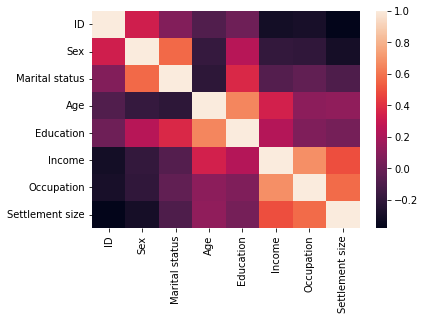

In [8]:
corMx = df.corr()
sns.heatmap(corMx)

## Проверка пропусков

Рассмотрим столбцы, в которых могут быть выбросы.

ID рассматривать не будем. Также не рассматриваем категориальные: Sex, Martial status, Education, Occupation, Settlement size.

Остаются: Age, Income

<AxesSubplot:>

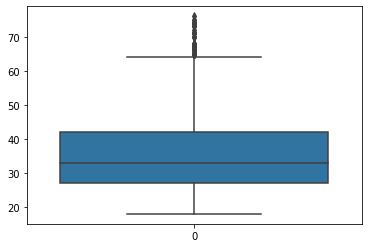

In [9]:
sns.boxplot(data=df['Age'])

В столбце Age нет выбросов.

<AxesSubplot:>

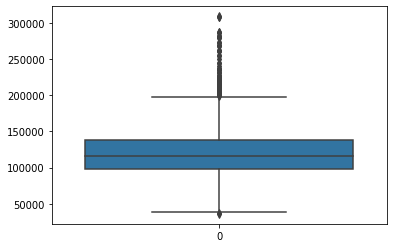

In [10]:
sns.boxplot(data=df['Income'])

## Удаление выбросов

Попробуем удалить выбросы с помощью квартилей

In [11]:
# def drop_out(df, col):
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     dif = q3 - q1
#     # реализуем правило удаления выбросов
#     down = q1 - 1.5 * dif
#     up = q3 + 1.5 * dif
#     df.drop(df[(df[col] < down) | (df[col] > up)].index, inplace=True)


# drop_out(df, 'Income')

Посмотрим на боксплот после удаления выбросов

In [12]:
# sns.boxplot(data=df['Income'])

Проверим размер датасета после удаления выбросов

In [13]:
# df.shape

## Нормализация данных

Все данные числового типа, поэтому просто нормализуем их с помощью StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()


df = df.drop('ID', axis=1)

ss.fit(df)
X = ss.transform(df)

Посмотрим на полученный датасет

In [15]:
X = pd.DataFrame(X, columns=df.columns)
X.head()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [16]:
X.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


## Кластеризация

Лист, которых хранит информацию о силуэте для метрик и кластеров

In [17]:
lst_siluete = []

### K-means кластеризация

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

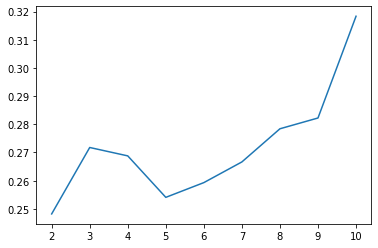

In [19]:
siluete = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    siluete.append(silhouette_score(X, kmeans.labels_))
plt.plot(range(2, 11), siluete)


Рассмотрим количество кластеров = 3

In [20]:
kmeans = KMeans(n_clusters=3)
result_kmeans3 = kmeans.fit(X)
df_kmeans = X.copy()
df_kmeans['Claster'] = result_kmeans3.labels_
df_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Claster
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,2
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,0
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,1
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,1


In [21]:
s = silhouette_score(X, kmeans.labels_)
print(s)
lst_siluete.append("kmeans 3 кластера = " + str(s))


0.2656255437984843


Посмотрим на графики

In [22]:
# sns.catplot(x="Claster", y="Age", data=df_kmeans)


In [23]:
# sns.catplot(x="Claster", y="Income", data=df_kmeans)

In [24]:
# plt.scatter(df["Age"], df["Income"], c=result_kmeans3.labels_)


Проба на 9 кластерах

In [25]:
kmeans = KMeans(n_clusters=9)
result_kmeans3 = kmeans.fit(X)
df_kmeans = X.copy()
df_kmeans['Claster'] = result_kmeans3.labels_
df_kmeans.head()



,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Claster
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,7
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,1
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,0
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,7
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,7


In [26]:
s = silhouette_score(X, result_kmeans3.labels_)
print(s)
lst_siluete.append("kmeans 9 кластеров = " + str(s))


0.2923070949771835


In [27]:
kmeans = KMeans(n_clusters=2)
result_kmeans3 = kmeans.fit(X)
df_kmeans = X.copy()
df_kmeans['Claster'] = result_kmeans3.labels_
df_kmeans.head()



,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Claster
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,0
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,0


In [28]:
s = silhouette_score(X, result_kmeans3.labels_)
print(s)
lst_siluete.append("kmeans 2 кластеров = " + str(s))


0.24820216342164297


In [29]:
# sns.catplot(x="Claster", y="Age", data=df_kmeans)


In [30]:
# sns.catplot(x="Claster", y="Income", data=df_kmeans)


In [31]:
# plt.scatter(df["Age"], df["Income"], c=result_kmeans3.labels_)


## Иерархическая кластеризация

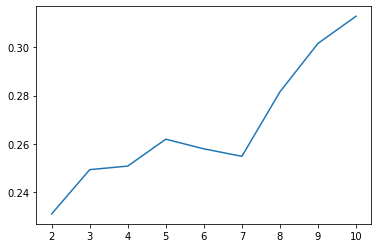

In [32]:
from sklearn.cluster import AgglomerativeClustering
# clf = AgglomerativeClustering(n_clusters=3)
# result_aggl = clf.fit(X)
# labels = result_aggl.labels_

siluete = []
for k in range(2, 11):
    clf = AgglomerativeClustering(n_clusters=k)
    result_aggl = clf.fit(X)
    siluete.append(silhouette_score(X, result_aggl.labels_))
plt.plot(range(2, 11), siluete)


Возможно, подходящее число кластеров в данном случае = 5. Пока проверим на 3, чтобы сравнить с kmeans на трех

In [33]:
clf = AgglomerativeClustering(n_clusters=3)
result_aggl = clf.fit(X)
df_aggl = X.copy()
df_aggl['Claster'] = result_aggl.labels_
df_aggl.head()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Claster
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,2
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,0
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,1
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,1


In [34]:
s = silhouette_score(X, result_aggl.labels_)
print(s)
lst_siluete.append("aggl 3 кластера = " + str(s))


0.24932369297836884


In [35]:
clf = AgglomerativeClustering(n_clusters=2)
result_aggl = clf.fit(X)
df_aggl = X.copy()
df_aggl['Claster'] = result_aggl.labels_
df_aggl.head()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Claster
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,1
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,0
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,0


In [36]:
s = silhouette_score(X, result_aggl.labels_)
print(s)
lst_siluete.append("aggl 2 кластера = " + str(s))


0.23099458010188773


Те же графики, которые были для kmeans 3

In [37]:
# sns.catplot(x="Claster", y="Age", data=df_aggl)

In [38]:
# sns.catplot(x="Claster", y="Income", data=df_aggl)


In [39]:
# plt.scatter(df["Age"], df["Income"], c=result_aggl.labels_)


Попробуем иерархическую для 5 кластеров

In [40]:
clf = AgglomerativeClustering(n_clusters=5)
result_aggl = clf.fit(X)
df_aggl = X.copy()
df_aggl['Claster'] = result_aggl.labels_
df_aggl.head()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Claster
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,2
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,3
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,4
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,0
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,0


In [41]:
s = silhouette_score(X, result_aggl.labels_)
print(s)
lst_siluete.append("aggl 5 кластеров = " + str(s))


0.261944083191251


In [42]:
# sns.catplot(x="Claster", y="Age", data=df_aggl)

In [43]:
# sns.catplot(x="Claster", y="Income", data=df_aggl)

In [44]:
# plt.scatter(df["Age"], df["Income"], c=result_aggl.labels_)

Проба на 10 кластерах

In [45]:
clf = AgglomerativeClustering(n_clusters=10)
result_aggl = clf.fit(X)
df_aggl = X.copy()
df_aggl['Claster'] = result_aggl.labels_
df_aggl.head()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Claster
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,4
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,1
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,0
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,0


In [46]:
silhouette_score(X, result_aggl.labels_)


0.31286631510337204

Проба на 9 кластерах

In [47]:
clf = AgglomerativeClustering(n_clusters=9)
result_aggl = clf.fit(X)
df_aggl = X.copy()
df_aggl['Claster'] = result_aggl.labels_
df_aggl.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Claster
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,3
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,1
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,1


In [48]:
s = silhouette_score(X, result_aggl.labels_)
print(s)
lst_siluete.append("aggl 9 кластеров = " + str(s))


0.3016137339305145


In [49]:
# sns.catplot(x="Claster", y="Age", data=df_aggl)

In [50]:
# sns.catplot(x="Claster", y="Income", data=df_aggl)


In [51]:
# plt.scatter(df["Age"], df["Income"], c=result_aggl.labels_)


Результат не лучше. Для сравнения еще возьмем kmeans для 5 кластеров

In [52]:
kmeans = KMeans(n_clusters=5)
result_kmeans3 = kmeans.fit(X)
df_kmeans = X.copy()
df_kmeans['Claster'] = result_kmeans3.labels_
df_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Claster
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,4
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3


In [53]:
s = silhouette_score(X, result_kmeans3.labels_)
print(s)
lst_siluete.append("kmeans 5 кластеров = " + str(s))


0.26118553650481047


In [54]:
# sns.catplot(x="Claster", y="Age", data=df_kmeans)

In [55]:
# sns.catplot(x="Claster", y="Income", data=df_kmeans)

In [56]:
# plt.scatter(df["Age"], df["Income"], c=kmeans.labels_)

## DBSCAN

In [83]:
from sklearn.cluster import DBSCAN
import random

dbscan = DBSCAN(eps=random.random(), min_samples=random.randint(0, 11))

dbscan.fit(X)

DBSCAN(eps=0.9122472590644192, min_samples=8)

In [84]:
dbscan.labels_

array([ 0,  1,  2, ..., 17,  7, 17], dtype=int64)

In [85]:
df_dbscan = X.copy()
df_dbscan['Claster'] = dbscan.labels_
df_dbscan.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Claster
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,1
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3


In [60]:
# sns.catplot(x="Claster", y="Age", data=df_dbscan)

In [61]:
# sns.catplot(x="Claster", y="Income", data=df_dbscan)

In [62]:
# plt.scatter(df["Age"], df["Income"], c=dbscan.labels_)

In [86]:
s = silhouette_score(X, dbscan.labels_)
print(s)
lst_siluete.append("dbscan с eps " + str(dbscan.eps) + " min_samples " + str(dbscan.min_samples) + " = " + str(s))


0.37684162089041695


Все полученные силуэты

In [87]:
lst_siluete

['kmeans 3 кластера = 0.2656255437984843',
 'kmeans 9 кластеров = 0.2923070949771835',
 'kmeans 2 кластеров = 0.24820216342164297',
 'aggl 3 кластера = 0.24932369297836884',
 'aggl 2 кластера = 0.23099458010188773',
 'aggl 5 кластеров = 0.261944083191251',
 'aggl 9 кластеров = 0.3016137339305145',
 'kmeans 5 кластеров = 0.26118553650481047',
 'dbscan с eps 0.07180176272732908 min_samples 3 = -0.45556620923431207',
 'dbscan с eps 0.8386553255570547 min_samples 2 = 0.4730388001696076',
 'dbscan с eps 0.630664030698468 min_samples 9 = 0.3264426738137654',
 'dbscan с eps 0.9122472590644192 min_samples 8 = 0.37684162089041695']

Повторим лучший результат за все прогоны (был получен на предыдущих запусках блокнота)

In [67]:
dbscan = DBSCAN(eps=0.7752287287374522, min_samples=2)
dbscan.fit(X)
df_dbscan = X.copy()
df_dbscan['Claster'] = dbscan.labels_
print(dbscan.labels_)
print("Коэф.силуэта " + str(silhouette_score(X, dbscan.labels_)))
df_dbscan.head()


[ 0  1  2 ... 21 10 21]
Коэф.силуэта 0.47277888191439205


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Claster
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,1
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3


## Лучший результат был достигнут при кластеризации DBSCAN с параметрами eps = 0.7752287287374522, min_samples 2, коэффициент силуэта = 0.47277888191439205, количество кластеров = 22